## TP3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos posit. os
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección

In [1]:
%matplotlib qt

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Vamos a probar con los 6 métodos de detección de patrones y observar en donde obtenemos falsos positivos para descartarlos. 
#### Comenzamos con la imagen logo_1.pngng"

In [2]:
# Cargamos la imagen a procesar
img = cv.imread('images/logo_1.png')

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('template/pattern.png',0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rgb)

In [3]:
w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
    img_salida = img_rgb.copy()
    
    method = eval(meth)
    
    # Aplicamos la coincidencia de patrones
    #--------------------------------------
    res = cv.matchTemplate(img_gray, template, method)
    
    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Marcamos el lugar donde lo haya encontrado
    #----------------------------------------
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
    
    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure()
    
    # Resultado de coincidencia
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122),plt.imshow(img_salida)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()

Podemos observar lo siguiente:
1. Con el metodo **Coeficiente de correlación cruzada** obtenemos un falso positivo parcial ya que al parecer detecta parte del  logo pero no llega a reconocerlo completamente.
2. Con el metodo **Coeficiente de correlación cruzada normalizado** observamos el mismo comportamiento que con TM_CCOEFF.
3. Con el metodo de **Correlación cruzada** observamos que tenemos una correcta deteccion salvo por una pequeña parte del logo que no llega a detectar.
4. Con el metodo de **Correlación cruzada normalizada** al igual que en TM_CCOEFF y TM_CCOEFF_NORMED observamos que solo detecta una parte del logo.
5. Con el metodo de **CDiferencia cuadrática media (SSD)** observamos que si hace una correcta detección del logo encerrando en el cuadro gran parte del logo pero dejando afuera una parte de la primera "C" de la palabra Coca Cola.
6. Con el metodo de **CDiferencia cuadrática media (SSD) normalizado** mismo resultado que con TM_SQDIFF

#### Hacemos lo mismo para "coca_logo_1".

In [3]:
# Cargamos la imagen a procesar
img = cv.imread('images/coca_logo_1.png')

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('template/pattern.png',0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rgb)

In [4]:
template_scaled = cv.resize(template, (0, 0), fx=0.5, fy=0.7, interpolation=cv.INTER_AREA)

En el caso de esta imagen el codigo me da un error ya que la imagen es más pequeña que el template, lo que hago es primero hacer una detección de dicho problema para cada metodo e implemento un metodo para escalar la imagen del tamaño del template para poder implementar los metodos

In [5]:
def escalar_imagen_si_necesario(img_rgb, img_gray, template):
    h_img, w_img = img_gray.shape
    h_temp, w_temp = template.shape

    # Si la imagen es más pequeña que el template en cualquier dimensión
    if h_img < h_temp or w_img < w_temp:
        # Calculamos el factor necesario para igualar dimensiones
        scale_h = h_temp / h_img
        scale_w = w_temp / w_img
        scale_factor = max(scale_h, scale_w) + 0.05  # Un poco más para asegurar

        new_width = int(w_img * scale_factor)
        new_height = int(h_img * scale_factor)

        # Escalar ambas imágenes
        img_gray_scaled = cv.resize(img_gray, (new_width, new_height), interpolation=cv.INTER_LINEAR)
        img_rgb_scaled = cv.resize(img_rgb, (new_width, new_height), interpolation=cv.INTER_LINEAR)

        print(f"🔁 Imagen escalada automáticamente a: {new_width}x{new_height}")
        return img_rgb_scaled, img_gray_scaled
    else:
        return img_rgb, img_gray

In [6]:
w, h = template_scaled.shape[::-1]

# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

img_rgb, img_gray = escalar_imagen_si_necesario(img_rgb, img_gray, template_scaled)

for meth in methods:
    img_salida = img_rgb.copy()
    method = eval(meth)

    # Verificación de tamaño
    if img_gray.shape[0] < template_scaled.shape[0] or img_gray.shape[1] < template_scaled.shape[1]:
        print(f"⚠️ El template es más grande que la imagen. Saltando método: {meth}")
        continue

    # Aplicamos la coincidencia de patrones
    res = cv.matchTemplate(img_gray, template_scaled, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Si el método es SQDIFF, buscamos el mínimo; en otros, el máximo
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_salida, top_left, bottom_right, 255, 2)

    # Mostrar resultados
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])

    plt.subplot(122)
    plt.imshow(img_salida)
    plt.title('Detected Point')
    plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()



In [ ]:
# Cargar imagen y template originales
img_rgb = cv.imread('images/coca_logo_1.png') 
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template_orig = cv.imread('template/pattern.png', 0)  

# Métodos de OpenCV para comparar
methods = {
    'TM_CCOEFF': cv.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
    'TM_CCORR': cv.TM_CCORR,
    'TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
    'TM_SQDIFF': cv.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED,
}

# Escalas a probar (ajustables)
scales = np.linspace(0.4, 0.47, 64)

# Preparar gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Procesar cada método
for i, (name, method) in enumerate(methods.items()):
    best_val = -np.inf
    best_match = None
    best_template = None
    best_scale = None

    for scale in scales:
        template_scaled = cv.resize(template_orig, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_AREA)
        h, w = template_scaled.shape

        if img_gray.shape[0] < h or img_gray.shape[1] < w:
            continue

        res = cv.matchTemplate(img_gray, template_scaled, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

        val = -min_val if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_val

        if val > best_val:
            best_val = val
            best_match = min_loc if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_loc
            best_template = template_scaled.copy()
            best_scale = scale

    # Dibujar el mejor match
    result_img = img_rgb.copy()
    h, w = best_template.shape
    top_left = best_match
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(result_img, top_left, bottom_right, (0, 255, 0), 2)

    axes[i].imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    axes[i].set_title(f"{name} (escala {best_scale:.2f})")
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Mejor coincidencia por método (multiescala)", fontsize=18, y=1.05)
plt.show()


- Nos dimos cuenta que todos los metodos nos dan con esta imagen un falso positivo, al detectar zonas con mucho blanco, por lo tanto lo que hacemos es pre-procesar el template y la imagen para poder reducir la informacion a correlacionar, en este caso usamos Canny para ese pre-procesamiento. 

In [ ]:
# Cargar imagen y template
img_color = cv.imread('images/coca_logo_1.png')  
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
template_gray = cv.imread('template/pattern.png', 0) 

# Aplicar Canny a la imagen
img_edges = cv.Canny(img_gray, 50, 150)

# Escalar el template
template_scaled = cv.resize(template_gray, (0, 0), fx=0.5, fy=0.5, interpolation=cv.INTER_AREA)
template_edges = cv.Canny(template_scaled, 50, 150)
h, w = template_edges.shape

# Métodos a probar
methods = {
    'TM_CCOEFF': cv.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
    'TM_CCORR': cv.TM_CCORR,
    'TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
    'TM_SQDIFF': cv.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
}

# Preparar figura
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Verificar que el template quepa
if img_edges.shape[0] >= h and img_edges.shape[1] >= w:
    for i, (name, method) in enumerate(methods.items()):
        img_result = img_color.copy()
        result = cv.matchTemplate(img_edges, template_edges, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Según el método, usar mínimo o máximo
        top_left = min_loc if 'SQDIFF' in name else max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv.rectangle(img_result, top_left, bottom_right, (0, 255, 0), 2)

        axes[i].imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
        axes[i].set_title(f'{name}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle("Detección del logo con Canny y 6 métodos", fontsize=18, y=1.02)

    # Mostrar template escalado al lado
    plt.figure(figsize=(4, 4))
    plt.imshow(template_edges, cmap='gray')
    plt.title("Template (Canny + Escalado)")
    plt.axis('off')
    plt.show()

else:
    print("El template aún es más grande que la imagen.")

- Finalmente observamos las imagenes pre-procesadas y la deteccion del logo con el metodo TM_CCOEFF_NORMED.

#### Trabajamos lo mismo para "coca_logo_2".

In [9]:
# Cargamos la imagen a procesar
img = cv.imread('images/coca_logo_2.png')

img_rgb= cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('template/pattern.png',0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rgb)

- Nuevamente obtenemos un error de escalas en donde el template es mas grande que la imagen en donde debemos detectar el logo, por lo que intentamos nuevamente con Canny pero esta vez probamos varias escalas de template para poder hacer la deteccion. 

In [ ]:
# Cargar imagen y template
img_color = cv.imread('images/coca_logo_2.png') 
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
template_gray = cv.imread('template/pattern.png', 0) 

# Aplicar Canny a la imagen
img_edges = cv.Canny(img_gray, 50, 150)

# Escalar el template
template_scaled = cv.resize(template_gray, (0, 0), fx=0.5, fy=0.7, interpolation=cv.INTER_AREA)
template_edges = cv.Canny(template_scaled, 50, 150)
h, w = template_edges.shape

# Métodos a probar
methods = {
    'TM_CCOEFF': cv.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
    'TM_CCORR': cv.TM_CCORR,
    'TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
    'TM_SQDIFF': cv.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
}

# Preparar figura
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Verificar que el template quepa
if img_edges.shape[0] >= h and img_edges.shape[1] >= w:
    for i, (name, method) in enumerate(methods.items()):
        img_result = img_color.copy()
        result = cv.matchTemplate(img_edges, template_edges, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Según el método, usar mínimo o máximo
        top_left = min_loc if 'SQDIFF' in name else max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv.rectangle(img_result, top_left, bottom_right, (0, 255, 0), 2)

        axes[i].imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
        axes[i].set_title(f'{name}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle("Detección del logo con Canny y 6 métodos", fontsize=18, y=1.02)

    # Mostrar template escalado al lado
    plt.figure(figsize=(4, 4))
    plt.imshow(template_edges, cmap='gray')
    plt.title("Template (Canny + Escalado)")
    plt.axis('off')
    plt.show()

else:
    print("El template aún es más grande que la imagen.")

#### Finalmente hacemos lo mismo con el resto de las imagenes

#### Probamos con la imagen coca_multi.png, que tiene el logo mas pequeño, por lo que  intentamos escalar el template para que sea mas pequeño.

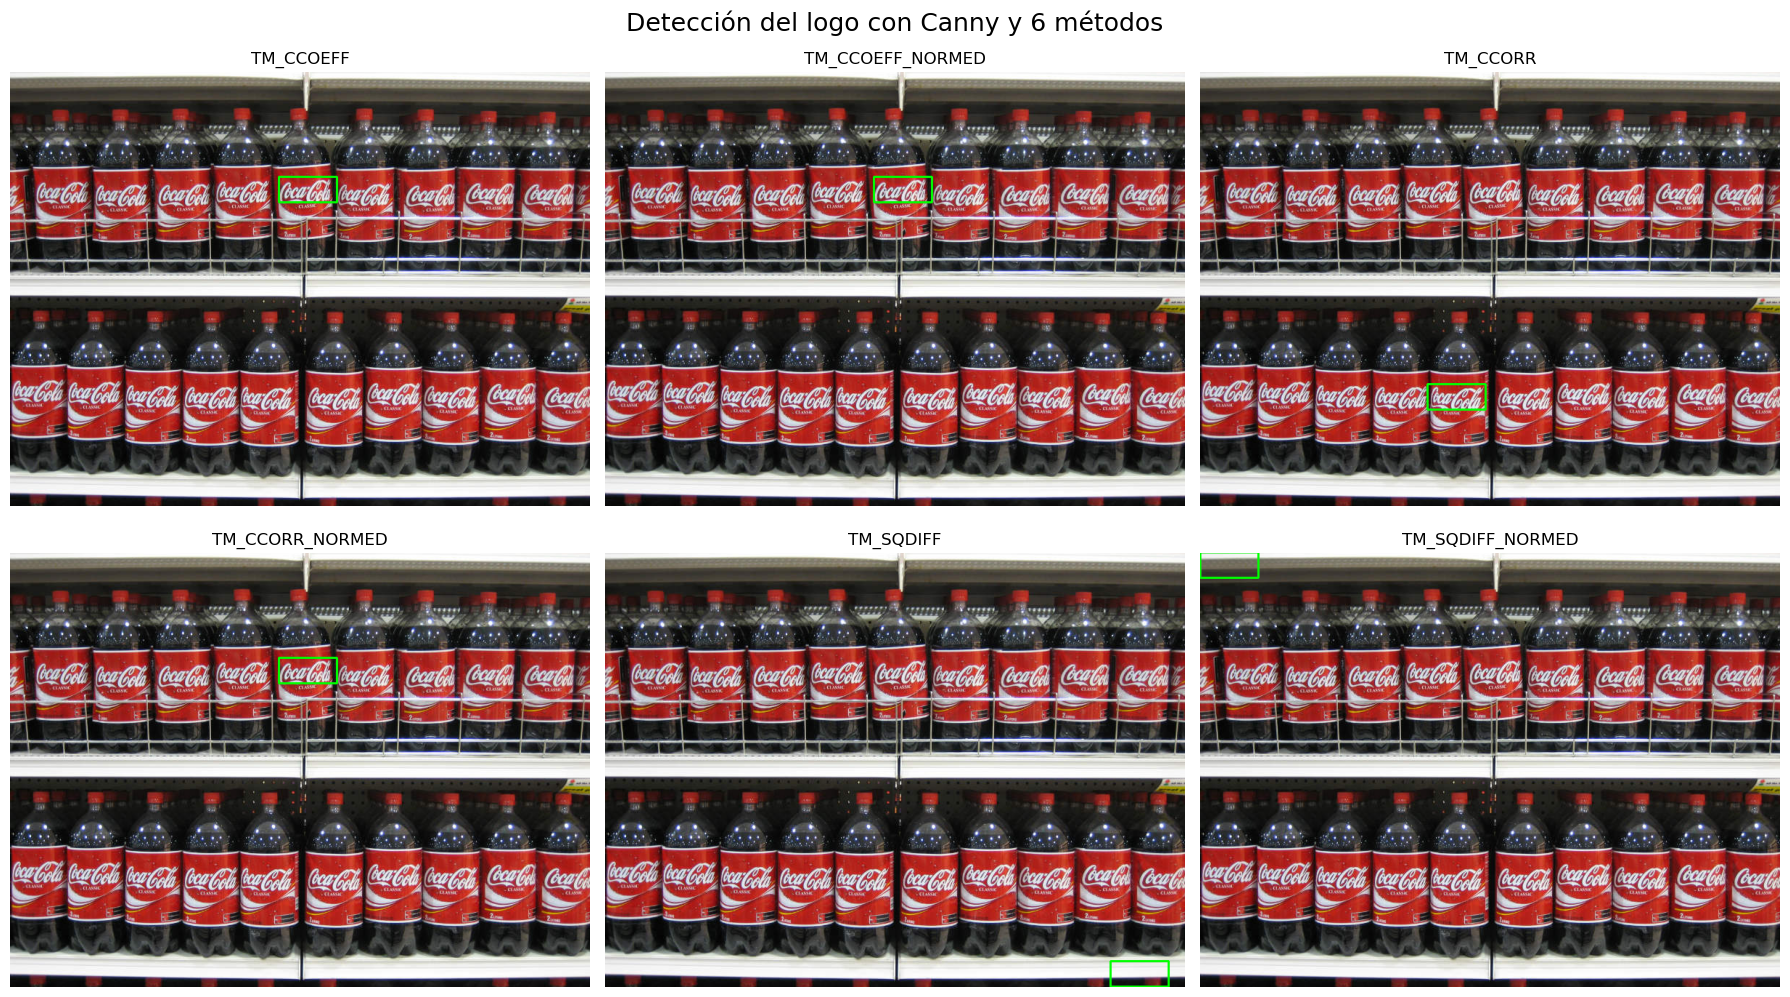

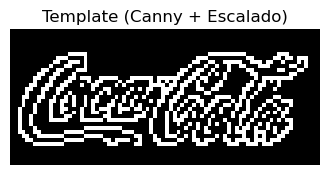

In [16]:
# Cargar imagen y template
img_color = cv.imread('images/coca_multi.png')  
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
template_gray = cv.imread('template/pattern.png', 0)  

# Aplicar Canny a la imagen
img_edges = cv.Canny(img_gray, 50, 150)

# Escalar el template
template_scaled = cv.resize(template_gray, (0, 0), fx=0.2, fy=0.2, interpolation=cv.INTER_AREA)
template_edges = cv.Canny(template_scaled, 50, 150)
h, w = template_edges.shape

# Métodos a probar
methods = {
    'TM_CCOEFF': cv.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
    'TM_CCORR': cv.TM_CCORR,
    'TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
    'TM_SQDIFF': cv.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
}

# Preparar figura
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Verificar que el template quepa
if img_edges.shape[0] >= h and img_edges.shape[1] >= w:
    for i, (name, method) in enumerate(methods.items()):
        img_result = img_color.copy()
        result = cv.matchTemplate(img_edges, template_edges, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Según el método, usar mínimo o máximo
        top_left = min_loc if 'SQDIFF' in name else max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv.rectangle(img_result, top_left, bottom_right, (0, 255, 0), 2)

        axes[i].imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
        axes[i].set_title(f'{name}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle("Detección del logo con Canny y 6 métodos", fontsize=18, y=1.02)

    # Mostrar template escalado al lado
    plt.figure(figsize=(4, 4))
    plt.imshow(template_edges, cmap='gray')
    plt.title("Template (Canny + Escalado)")
    plt.axis('off')
    plt.show()

else:
    print("El template aún es más grande que la imagen.")


#### Probamos con la imagen coca_retro_1.png, que tiene el logo mas grand, por lo que  intentamos escalar el template para que sea mas grande probando diferentes valores de fx y fy.

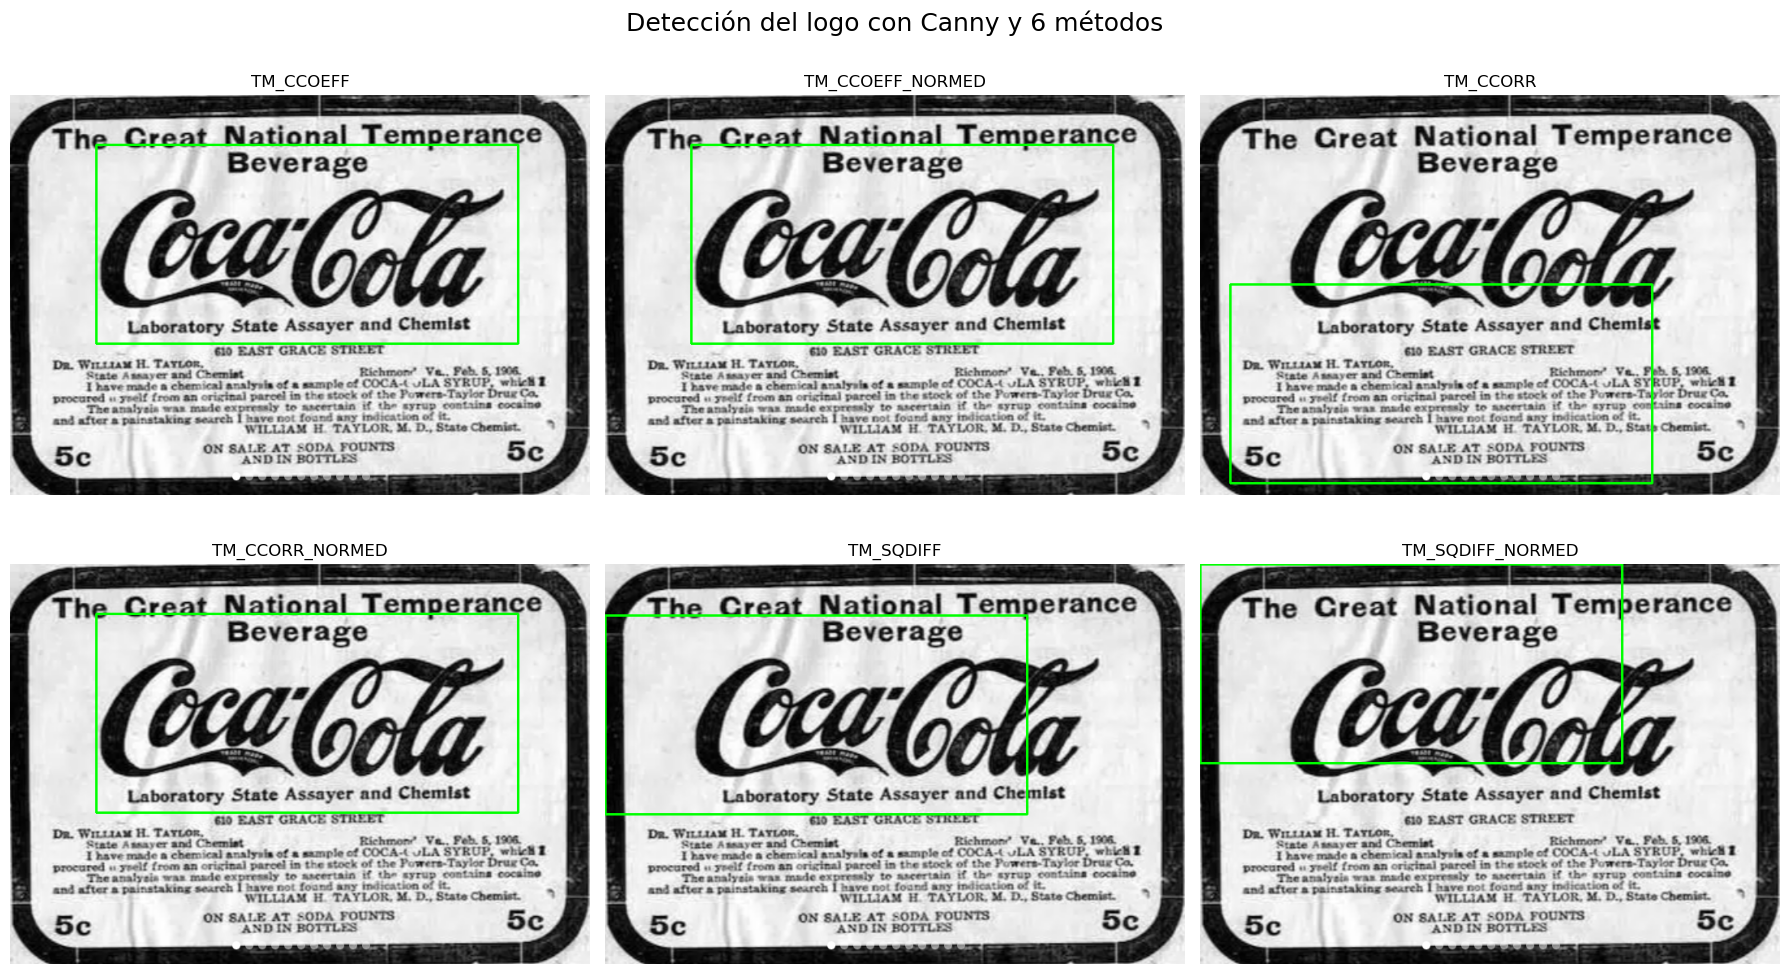

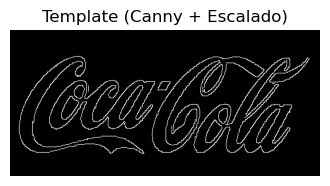

In [39]:
# Cargar imagen y template
img_color = cv.imread('images/coca_retro_1.png')  
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
template_gray = cv.imread('template/pattern.png', 0)  

# Aplicar Canny a la imagen
img_edges = cv.Canny(img_gray, 50, 150)

# Escalar el template
template_scaled = cv.resize(template_gray, (0, 0), fx=1.3, fy=1.4, interpolation=cv.INTER_AREA)
template_edges = cv.Canny(template_scaled, 50, 150)
h, w = template_edges.shape

# Métodos a probar
methods = {
    'TM_CCOEFF': cv.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
    'TM_CCORR': cv.TM_CCORR,
    'TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
    'TM_SQDIFF': cv.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
}

# Preparar figura
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Verificar que el template quepa
if img_edges.shape[0] >= h and img_edges.shape[1] >= w:
    for i, (name, method) in enumerate(methods.items()):
        img_result = img_color.copy()
        result = cv.matchTemplate(img_edges, template_edges, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Según el método, usar mínimo o máximo
        top_left = min_loc if 'SQDIFF' in name else max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv.rectangle(img_result, top_left, bottom_right, (0, 255, 0), 2)

        axes[i].imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
        axes[i].set_title(f'{name}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle("Detección del logo con Canny y 6 métodos", fontsize=18, y=1.02)

    # Mostrar template escalado al lado
    plt.figure(figsize=(4, 4))
    plt.imshow(template_edges, cmap='gray')
    plt.title("Template (Canny + Escalado)")
    plt.axis('off')
    plt.show()

else:
    print("El template aún es más grande que la imagen.")


#### Probamos con la imagen coca_retro_2.png, volvemos a valores de fx y fy de 0.4 y logramos el match con 4 metodos

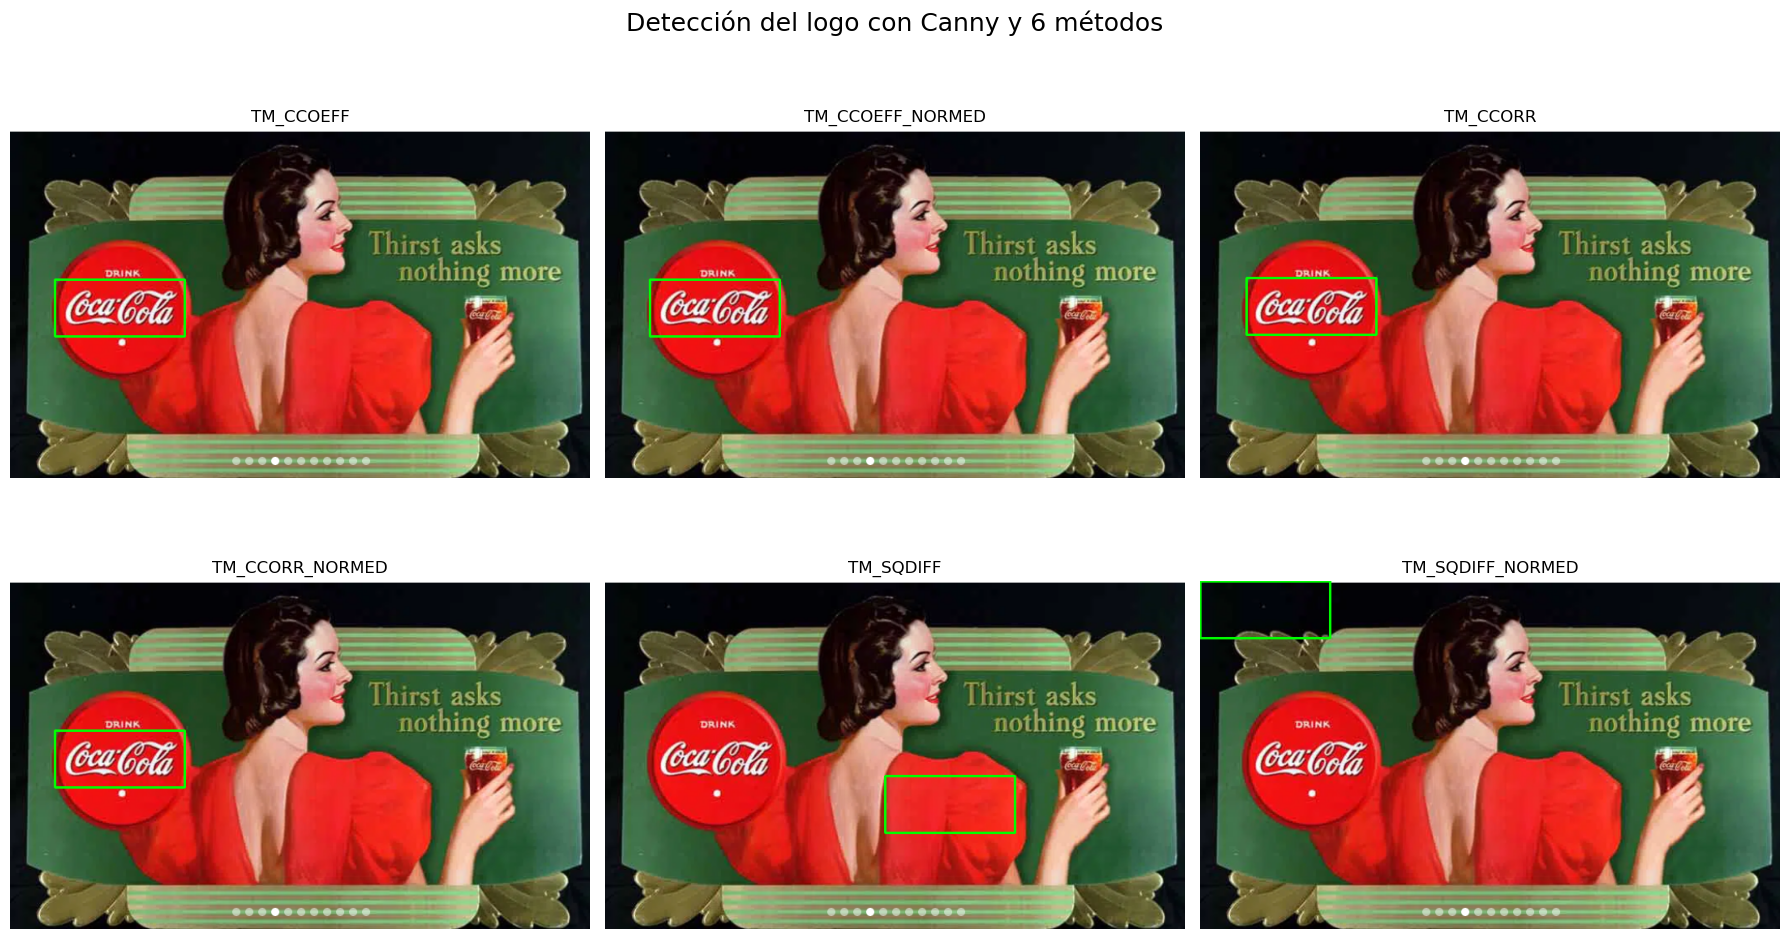

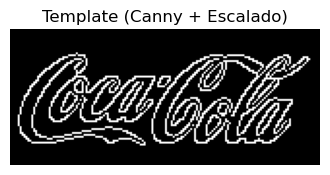

In [38]:
# Cargar imagen y template
img_color = cv.imread('images/coca_retro_2.png')  
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
template_gray = cv.imread('template/pattern.png', 0)  

# Aplicar Canny a la imagen
img_edges = cv.Canny(img_gray, 50, 150)

# Escalar el template
template_scaled = cv.resize(template_gray, (0, 0), fx=0.4, fy=0.4, interpolation=cv.INTER_AREA)
template_edges = cv.Canny(template_scaled, 50, 150)
h, w = template_edges.shape

# Métodos a probar
methods = {
    'TM_CCOEFF': cv.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
    'TM_CCORR': cv.TM_CCORR,
    'TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
    'TM_SQDIFF': cv.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
}

# Preparar figura
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Verificar que el template quepa
if img_edges.shape[0] >= h and img_edges.shape[1] >= w:
    for i, (name, method) in enumerate(methods.items()):
        img_result = img_color.copy()
        result = cv.matchTemplate(img_edges, template_edges, method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Según el método, usar mínimo o máximo
        top_left = min_loc if 'SQDIFF' in name else max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv.rectangle(img_result, top_left, bottom_right, (0, 255, 0), 2)

        axes[i].imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
        axes[i].set_title(f'{name}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.suptitle("Detección del logo con Canny y 6 métodos", fontsize=18, y=1.02)

    # Mostrar template escalado al lado
    plt.figure(figsize=(4, 4))
    plt.imshow(template_edges, cmap='gray')
    plt.title("Template (Canny + Escalado)")
    plt.axis('off')
    plt.show()

else:
    print("El template aún es más grande que la imagen.")


#### Finalmente probamos con la imagen COCA-COLA-LOGO.jpg, intentamos a valores de fx y fy de 0.4 y logramos el match con 4 metodos

## Punto 2

### CCOEFF_NORMED con Canny

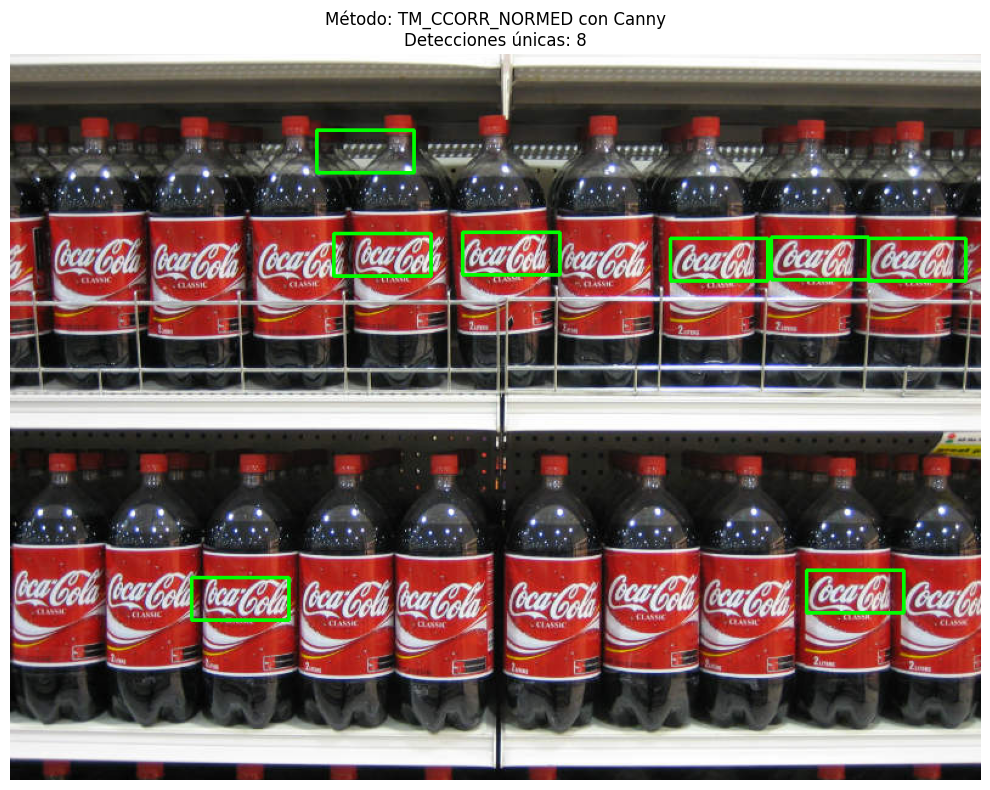

Se detectaron 8 botellas de Coca-Cola


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    boxes = boxes.astype("float")
    pick = []

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_coca_cola_bottles(img_path, template_path):
    # Cargar las imágenes
    img = cv.imread(img_path)
    template = cv.imread(template_path)
    
    # Convertir a escala de grises
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # Aplicar detección de bordes Canny al patrón
    template_edges = cv.Canny(template_gray, 50, 150)
    
    # Escalar el patrón a un tamaño fijo (0.2 del original)
    scale_width = 0.2
    scale_height = 0.2
    width = int(template_edges.shape[1] * scale_width)
    height = int(template_edges.shape[0] * scale_height)
    resized_template = cv.resize(template_edges, (width, height))
    
    # Aplicar Canny a la imagen de entrada
    img_edges = cv.Canny(img_gray, 150, 150)
    
    # Obtener dimensiones del template
    h, w = resized_template.shape
    
    # Aplicar template matching
    result = cv.matchTemplate(img_edges, resized_template, cv.TM_CCORR_NORMED)
    
    # Umbral de detección
    threshold = 0.22
    locations = np.where(result >= threshold)
    
    # Crear lista de cajas para aplicar NMS
    rects = []
    for pt in zip(*locations[::-1]):
        rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    
    rects = np.array(rects)
    final_boxes = non_max_suppression_fast(rects, 0.3)  # umbral de solapamiento
    
    # Dibujar cajas resultantes
    img_result = img.copy()
    for (x1, y1, x2, y2) in final_boxes:
        cv.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Mostrar resultado
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
    plt.title(f"Método: TM_CCORR_NORMED con Canny\nDetecciones únicas: {len(final_boxes)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(final_boxes), img_result

detections_count, result_img = detect_coca_cola_bottles('images/coca_multi.png', 'template/pattern.png')
print(f"Se detectaron {detections_count} botellas de Coca-Cola")

### Para todas las imagenes

#### 3. Generalizar el algoritmo del item 2 para todas las imágenes. Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección

- **Hacemos lo mismo con la imagen cola_retro_2.png logramos detectar el logo cambiando la escala del patron**

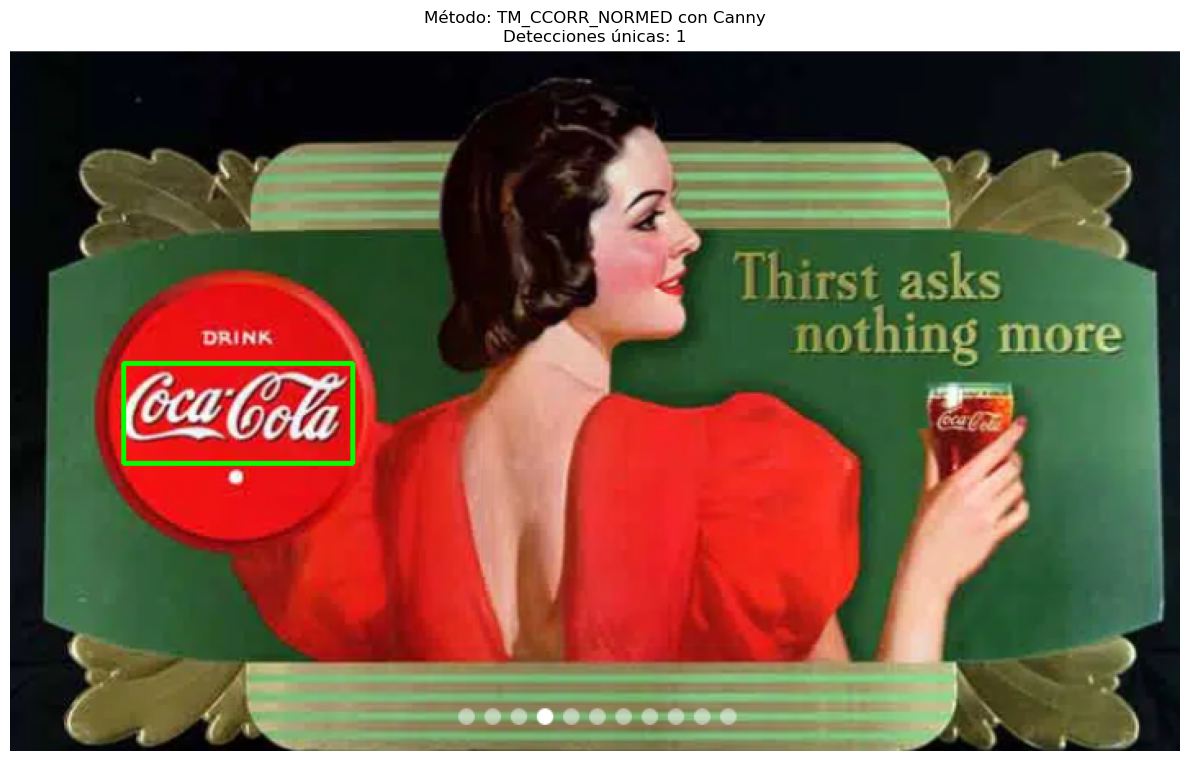

Se detectaron 1 botellas de Coca-Cola


In [47]:
def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    boxes = boxes.astype("float")
    pick = []

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_coca_cola_bottles(img_path, template_path):
    # Cargar las imágenes
    img = cv.imread(img_path)
    template = cv.imread(template_path)
    
    # Convertir a escala de grises
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # Aplicar detección de bordes Canny al patrón
    template_edges = cv.Canny(template_gray, 50, 150)
    
    # Escalar el patrón a un tamaño fijo (0.2 del original)
    scale_width = 0.35
    scale_height = 0.35
    width = int(template_edges.shape[1] * scale_width)
    height = int(template_edges.shape[0] * scale_height)
    resized_template = cv.resize(template_edges, (width, height))
    
    # Aplicar Canny a la imagen de entrada
    img_edges = cv.Canny(img_gray, 200, 200)
    
    # Obtener dimensiones del template
    h, w = resized_template.shape
    
    # Aplicar template matching
    result = cv.matchTemplate(img_edges, resized_template, cv.TM_CCORR_NORMED)
    
    # Umbral de detección
    threshold = 0.2
    locations = np.where(result >= threshold)
    
    # Crear lista de cajas para aplicar NMS
    rects = []
    for pt in zip(*locations[::-1]):
        rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    
    rects = np.array(rects)
    final_boxes = non_max_suppression_fast(rects, 0.3)  # umbral de solapamiento
    
    # Dibujar cajas resultantes
    img_result = img.copy()
    for (x1, y1, x2, y2) in final_boxes:
        cv.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Mostrar resultado
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
    plt.title(f"Método: TM_CCORR_NORMED con Canny\nDetecciones únicas: {len(final_boxes)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(final_boxes), img_result

detections_count, result_img = detect_coca_cola_bottles('images/coca_retro_2.png', 'template/pattern.png')
print(f"Se detectaron {detections_count} botellas de Coca-Cola")

- **Ahora con la imagen coca_logo_1.png hacemos lo mismo ajustando un poco tambien la escala del patron**

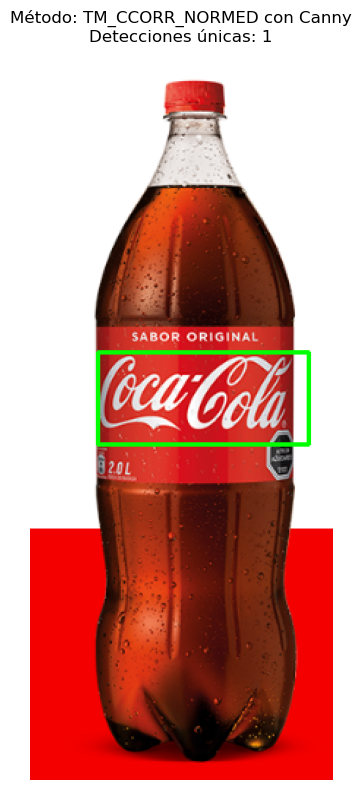

Se detectaron 1 botellas de Coca-Cola


In [52]:
def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    boxes = boxes.astype("float")
    pick = []

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_coca_cola_bottles(img_path, template_path):
    # Cargar las imágenes
    img = cv.imread(img_path)
    template = cv.imread(template_path)
    
    # Convertir a escala de grises
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # Aplicar detección de bordes Canny al patrón
    template_edges = cv.Canny(template_gray, 50, 150)
    
    # Escalar el patrón a un tamaño fijo (0.2 del original)
    scale_width = 0.36
    scale_height = 0.36
    width = int(template_edges.shape[1] * scale_width)
    height = int(template_edges.shape[0] * scale_height)
    resized_template = cv.resize(template_edges, (width, height))
    
    # Aplicar Canny a la imagen de entrada
    img_edges = cv.Canny(img_gray, 200, 200)
    
    # Obtener dimensiones del template
    h, w = resized_template.shape
    
    # Aplicar template matching
    result = cv.matchTemplate(img_edges, resized_template, cv.TM_CCORR_NORMED)
    
    # Umbral de detección
    threshold = 0.2
    locations = np.where(result >= threshold)
    
    # Crear lista de cajas para aplicar NMS
    rects = []
    for pt in zip(*locations[::-1]):
        rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    
    rects = np.array(rects)
    final_boxes = non_max_suppression_fast(rects, 0.3)  # umbral de solapamiento
    
    # Dibujar cajas resultantes
    img_result = img.copy()
    for (x1, y1, x2, y2) in final_boxes:
        cv.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Mostrar resultado
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
    plt.title(f"Método: TM_CCORR_NORMED con Canny\nDetecciones únicas: {len(final_boxes)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(final_boxes), img_result

detections_count, result_img = detect_coca_cola_bottles('images/coca_logo_1.png', 'template/pattern.png')
print(f"Se detectaron {detections_count} botellas de Coca-Cola")

- **Con la imagen cola_logo_2.png cambiamos la escala del patron y el umbral de detección**

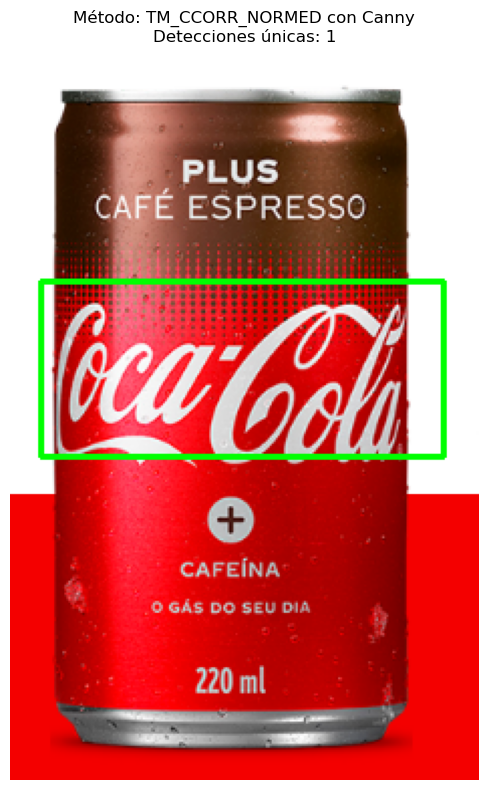

Se detectaron 1 botellas de Coca-Cola


In [112]:
def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    boxes = boxes.astype("float")
    pick = []

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_coca_cola_bottles(img_path, template_path):
    # Cargar las imágenes
    img = cv.imread(img_path)
    template = cv.imread(template_path)
    
    # Convertir a escala de grises
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # Aplicar detección de bordes Canny al patrón
    template_edges = cv.Canny(template_gray, 50, 150)
    
    # Escalar el patrón a un tamaño fijo (0.2 del original)
    scale_width = 0.5
    scale_height = 0.5
    width = int(template_edges.shape[1] * scale_width)
    height = int(template_edges.shape[0] * scale_height)
    resized_template = cv.resize(template_edges, (width, height))
    
    # Aplicar Canny a la imagen de entrada
    img_edges = cv.Canny(img_gray, 200, 200)
    
    # Obtener dimensiones del template
    h, w = resized_template.shape
    
    # Aplicar template matching
    result = cv.matchTemplate(img_edges, resized_template, cv.TM_CCORR_NORMED)
    
    # Umbral de detección
    threshold = 0.19
    locations = np.where(result >= threshold)
    
    # Crear lista de cajas para aplicar NMS
    rects = []
    for pt in zip(*locations[::-1]):
        rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    
    rects = np.array(rects)
    final_boxes = non_max_suppression_fast(rects, 0.3)  # umbral de solapamiento
    
    # Dibujar cajas resultantes
    img_result = img.copy()
    for (x1, y1, x2, y2) in final_boxes:
        cv.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Mostrar resultado
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
    plt.title(f"Método: TM_CCORR_NORMED con Canny\nDetecciones únicas: {len(final_boxes)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(final_boxes), img_result

detections_count, result_img = detect_coca_cola_bottles('images/coca_logo_2.png', 'template/pattern.png')
print(f"Se detectaron {detections_count} botellas de Coca-Cola")

- **Con logo_1.png cambiamos la escala y tambien ajustamos el umbral de detección**

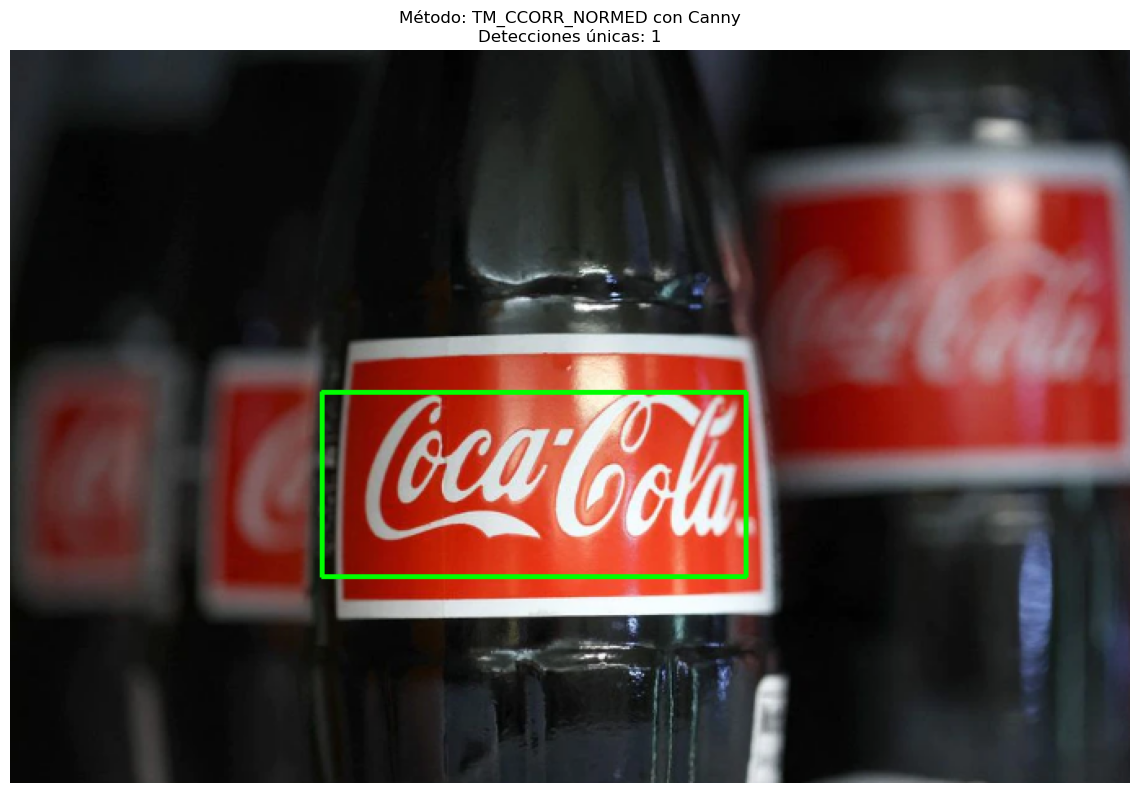

Se detectaron 1 botellas de Coca-Cola


In [86]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    boxes = boxes.astype("float")
    pick = []

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_coca_cola_bottles(img_path, template_path):
    # Cargar las imágenes
    img = cv.imread(img_path)
    template = cv.imread(template_path)
    
    # Convertir a escala de grises
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # Aplicar detección de bordes Canny al patrón
    template_edges = cv.Canny(template_gray, 50, 150)
    
    # Escalar el patrón a un tamaño fijo (0.2 del original)
    scale_width = 0.65
    scale_height = 0.65
    width = int(template_edges.shape[1] * scale_width)
    height = int(template_edges.shape[0] * scale_height)
    resized_template = cv.resize(template_edges, (width, height))
    
    # Aplicar Canny a la imagen de entrada
    img_edges = cv.Canny(img_gray, 200, 200)
    
    # Obtener dimensiones del template
    h, w = resized_template.shape
    
    # Aplicar template matching
    result = cv.matchTemplate(img_edges, resized_template, cv.TM_CCORR_NORMED)
    
    # Umbral de detección
    threshold = 0.15
    locations = np.where(result >= threshold)
    
    # Crear lista de cajas para aplicar NMS
    rects = []
    for pt in zip(*locations[::-1]):
        rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    
    rects = np.array(rects)
    final_boxes = non_max_suppression_fast(rects, 0.3)  # umbral de solapamiento
    
    # Dibujar cajas resultantes
    img_result = img.copy()
    for (x1, y1, x2, y2) in final_boxes:
        cv.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Mostrar resultado
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
    plt.title(f"Método: TM_CCORR_NORMED con Canny\nDetecciones únicas: {len(final_boxes)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(final_boxes), img_result

detections_count, result_img = detect_coca_cola_bottles('images/logo_1.png', 'template/pattern.png')
print(f"Se detectaron {detections_count} botellas de Coca-Cola")

- **Por ultimo con la imagen coca_retro_1.png** 

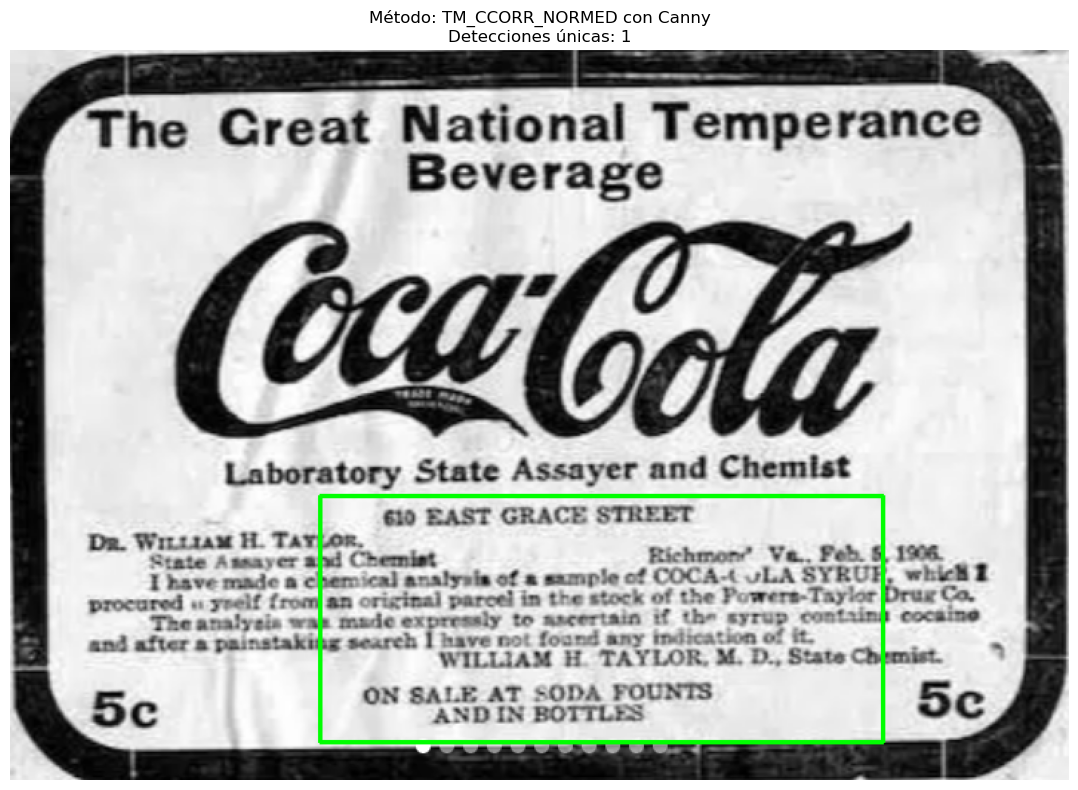

Se detectaron 1 botellas de Coca-Cola


In [147]:
def non_max_suppression_fast(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    boxes = boxes.astype("float")
    pick = []

    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)

        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_coca_cola_bottles(img_path, template_path):
    # Cargar las imágenes
    img = cv.imread(img_path)
    template = cv.imread(template_path)
    
    # Convertir a escala de grises
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    
    # Aplicar detección de bordes Canny al patrón
    template_edges = cv.Canny(template_gray, 100, 150)
    
    # Escalar el patrón a un tamaño fijo (0.2 del original)
    scale_width = 0.95
    scale_height = 0.95
    width = int(template_edges.shape[1] * scale_width)
    height = int(template_edges.shape[0] * scale_height)
    resized_template = cv.resize(template_edges, (width, height))
    
    # Aplicar Canny a la imagen de entrada
    img_edges = cv.Canny(img_gray, 250, 250)
    
    # Obtener dimensiones del template
    h, w = resized_template.shape
    
    # Aplicar template matching
    result = cv.matchTemplate(img_edges, resized_template, cv.TM_CCORR_NORMED)
    
    # Umbral de detección
    threshold = 0.17
    locations = np.where(result >= threshold)
    
    # Crear lista de cajas para aplicar NMS
    rects = []
    for pt in zip(*locations[::-1]):
        rects.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    
    rects = np.array(rects)
    final_boxes = non_max_suppression_fast(rects, 0.3)  # umbral de solapamiento
    
    # Dibujar cajas resultantes
    img_result = img.copy()
    for (x1, y1, x2, y2) in final_boxes:
        cv.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Mostrar resultado
    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img_result, cv.COLOR_BGR2RGB))
    plt.title(f"Método: TM_CCORR_NORMED con Canny\nDetecciones únicas: {len(final_boxes)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return len(final_boxes), img_result

detections_count, result_img = detect_coca_cola_bottles('images/coca_retro_1.png', 'template/pattern.png')
print(f"Se detectaron {detections_count} botellas de Coca-Cola")